### 프로젝트설명 
- 프로젝트 명: 서울특별시 인구 비율 시각화
- 프로젝트 개요 및 진행 배경 : 서울특별시의 외국인과 고령층 인구가 어느 지역에 분포 되어 있는지 확인하고자 진행함

- 데이터 : 20년도 서울시 인구수 
- Source: [서울시 열린데이터](https://data.seoul.go.kr/dataList/419/S/2/datasetView.do)

In [61]:
# Load DataFrame
import pandas as pd

df_target = pd.read_csv('./datas/report.txt', sep='\t',header=2, thousands=',')
df_target.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
1,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
2,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794
3,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439
4,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728


#### 데이터 전처리

In [62]:
# 0 번째 인덱스 제거 후 인덱스를 리셋
df_target.drop([0],inplace = True)
df_target.reset_index(drop=True,inplace=True)
df_target.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
1,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794
2,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439
3,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728
4,2020.1/4,광진구,165287,365990,176226,189764,350417,169568,180849,15573,6658,8915,2.12,48989


In [64]:
# 컬럼명 변경
new_columns = ['기간', '자치구', '세대', '합계', '남자', '여자', '한국인 계', '한국인 남자', '한국인 여자', '등록외국인 계', '등록외국인 남자', '등록외국인 여자', '세대당인구', '65세이상고령자']
df_target.columns = new_columns
df_target.head()

,기간,자치구,세대,합계,남자,여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자
0,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
1,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794
2,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439
3,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728
4,2020.1/4,광진구,165287,365990,176226,189764,350417,169568,180849,15573,6658,8915,2.12,48989


#### 서울시는 아래와 같이 5개의 권역으로 구분됨
![서울시 권역생활권](https://www.seoulsolution.kr/sites/default/files/images/%EC%B2%B4%EA%B3%846.jpg)
- ref: [서울시-도시계획체계](https://www.seoulsolution.kr/ko/content/서울시-도시계획체계)

- 도심권: ['종로구', '중구', '용산구']
- 동북권: ['성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구']
- 서북권: ['은평구', '서대문구', '마포구']
- 서남권: ['양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구']
- 동남권: ['서초구', '강남구', '송파구', '강동구']
***

In [65]:
region_dict = {'도심권': ['종로구', '중구', '용산구'],
               '동북권': ['성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구'],
               '서북권': ['은평구', '서대문구', '마포구'],
               '서남권': ['양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구'],
               '동남권': ['서초구', '강남구', '송파구', '강동구']
            }

In [66]:
# 권역 column 추가
def find_loc(gu):
    for key, value in region_dict.items():
        if gu in value:
            return key

df_target['권역'] = df_target.자치구.apply(lambda x : find_loc(x))
df_target.head()

,기간,자치구,세대,합계,남자,여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자,권역
0,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073,도심권
1,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794,도심권
2,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439,도심권
3,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728,동북권
4,2020.1/4,광진구,165287,365990,176226,189764,350417,169568,180849,15573,6658,8915,2.12,48989,동북권


In [67]:
# 외국인 비율 및 65세이상고령자 비율 column 생성
df_target['고령자비율'] = df_target['65세이상고령자'] / df_target['합계'] * 100
df_target['외국인비율'] = df_target['등록외국인 계'] / df_target['합계'] * 100

df_target.head()

,기간,자치구,세대,합계,남자,여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자,권역,고령자비율,외국인비율
0,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073,도심권,17.330724,6.646953
1,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794,도심권,17.435462,7.543105
2,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439,도심권,16.021368,6.737757
3,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728,동북권,14.560228,2.653381
4,2020.1/4,광진구,165287,365990,176226,189764,350417,169568,180849,15573,6658,8915,2.12,48989,동북권,13.385338,4.255034


In [68]:
# 권역별로 인구수 합 출력
import numpy as np

df_pivot_area = pd.pivot_table(data=df_target, index='권역', values=['세대', '합계', '한국인 계', '등록외국인 계', '65세이상고령자'], aggfunc=np.sum)
df_pivot_area = df_pivot_area[['세대', '합계', '한국인 계', '등록외국인 계', '65세이상고령자']]
df_pivot_area


,세대,합계,한국인 계,등록외국인 계,65세이상고령자
권역,,,,,
도심권,248091,544618,506971,37647,91306
동남권,876524,2122624,2102113,20511,286874
동북권,1342778,3076926,3008988,67938,497385
서남권,1360162,3075143,2950352,124791,454108
서북권,526451,1194470,1165231,29239,188566


In [69]:
# 고령자, 외국인, 세대당 인구 계산
df_pivot_area['고령자비율'] = df_pivot_area['65세이상고령자'] / df_pivot_area['합계'] * 100
df_pivot_area['외국인비율'] = df_pivot_area['등록외국인 계'] / df_pivot_area['합계'] * 100
df_pivot_area['세대당인구'] = (df_pivot_area['합계'] - df_pivot_area['등록외국인 계']) / df_pivot_area['세대']
df_pivot_area = df_pivot_area.sort_values(by='외국인비율')
df_pivot_area.head()

,세대,합계,한국인 계,등록외국인 계,65세이상고령자,고령자비율,외국인비율,세대당인구
권역,,,,,,,,
동남권,876524,2122624,2102113,20511,286874,13.515064,0.966304,2.398238
동북권,1342778,3076926,3008988,67938,497385,16.164997,2.207983,2.240868
서북권,526451,1194470,1165231,29239,188566,15.786583,2.447864,2.213370
서남권,1360162,3075143,2950352,124791,454108,14.767053,4.058055,2.169118
도심권,248091,544618,506971,37647,91306,16.765145,6.912552,2.043488


#### 시각화

In [70]:
# 한글 설정(Window)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

##### 구별 고령자비율

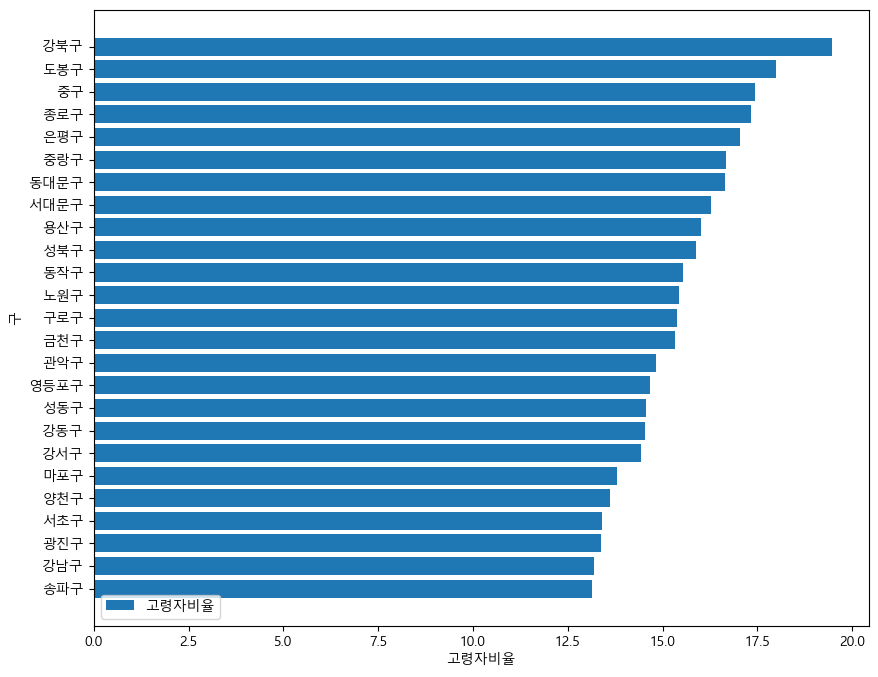

In [71]:
df_draw = df_target.sort_values(by='고령자비율')
def draw_gu_elder():
    y = df_draw['자치구']
    values = df_draw['고령자비율']
    plt.figure(figsize=(10,8))
    plt.ylabel('구')
    plt.xlabel('고령자비율')
    plt.barh(y, values)
    plt.legend(['고령자비율'],loc = 'lower left')
    plt.show()
draw_gu_elder()

- 강북구가 고령자 비율이 가장 높았다.

##### 권역 별 외국인 계

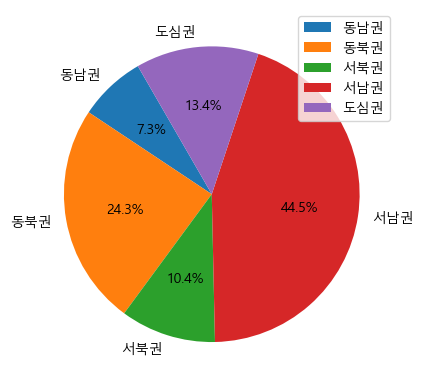

In [72]:
df_area_foreigner = df_pivot_area.copy()
labels = df_area_foreigner.index
def draw_area_foreigner():
    plt.pie(df_area_foreigner['등록외국인 계'], labels= labels,startangle = 120, autopct='%.1f%%')
    plt.legend()
    plt.show()
draw_area_foreigner()

- 외국인들은 서남권 지역에 대체로 살고 있다.
- 아마 외국인주민지원센터가 서남권에 위치하고 있어 그런 것 같다.